#### **MNIST MLP with Keras**

This is a template of an MNIST classifier with an Artificial Neural Network (MLP)
If follows the basic blocks of a Deep Learning classifier

This version is prepared to run in colab or locally (to run it locally start in the imports cell)

<a target="_blank" href="https://colab.research.google.com/github/castorgit/DL-course/blob/main/00_MNIST_MLP_Keras.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install tensorflow==2.17.1
!pip install keras==3.6.0
!pip install session_info

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.layers import ReLU, Dense, Softmax
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import sys
sys.stderr = open('err.txt', 'w')

I0000 00:00:1736869405.876119   22797 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1736869405.893548   22797 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1736869405.893607   22797 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1736869405.898637   22797 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1736869405.898689   22797 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [3]:
# Hyperparameters

num_classes = 10  # this is the number of digits
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### **Reading MNIST Dataset**
Most frameworks offer an easy way to download the MNIST dataset. In this case we use the datasets method

This is the way that Keras reads the dataset



In [4]:
# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
type(x_train)
# The loaded data are numpy arrays

numpy.ndarray

In [6]:
# Data Preprocessing
# Preprocess the data (flattening and normalization)
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#### **ANN architecture definition**
This is the key part of the notebook, in this cell we define the structure of the network 
and all the different elements mainly

- Activation function 
- Layer size
- Number of layers

In this example you have a simple model with a hidden layer of 10 neurons. How good will it be?

In [8]:
# MLP Model 1 hidden layer input size 784, output layer 10 (num of classes)
# ANN sizing details
hidden_size = 16

inputs = Input(shape= (784,))
x = Dense(hidden_size)(inputs)
x = ReLU()(x)
x = Dense(10)(x)
output = Softmax()(x)

model = Model(inputs=inputs, outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='SGD',
              loss='MeanSquaredError',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2)

Epoch 1/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1125 - loss: 0.0906 - val_accuracy: 0.1334 - val_loss: 0.0898
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1388 - loss: 0.0896 - val_accuracy: 0.1626 - val_loss: 0.0890
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1685 - loss: 0.0888 - val_accuracy: 0.1944 - val_loss: 0.0881
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1998 - loss: 0.0879 - val_accuracy: 0.2287 - val_loss: 0.0871
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2351 - loss: 0.0870 - val_accuracy: 0.2623 - val_loss: 0.0860
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2652 - loss: 0.0858 - val_accuracy: 0.2929 - val_loss: 0.0847
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2931 - loss: 0.0846 - val_accuracy: 0.3287 - val_loss: 0.0832
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3312 - loss: 0.0831 - val_accu

480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8565 - loss: 0.0249 - val_accuracy: 0.8688 - val_loss: 0.0227
Epoch 52/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8602 - loss: 0.0243 - val_accuracy: 0.8698 - val_loss: 0.0225
Epoch 53/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8602 - loss: 0.0241 - val_accuracy: 0.8712 - val_loss: 0.0222
Epoch 54/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8649 - loss: 0.0237 - val_accuracy: 0.8715 - val_loss: 0.0219
Epoch 55/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8606 - loss: 0.0238 - val_accuracy: 0.8729 - val_loss: 0.0217
Epoch 56/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8641 - loss: 0.0233 - val_accuracy: 0.8741 - val_loss: 0.0215
Epoch 57/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8660 - loss: 0.0231 - val_accuracy: 0.8750 - val_loss: 0.0213
Epoch 58/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8649 - loss: 0.0230 - val_accuracy:

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 - 1s - 4ms/step - accuracy: 0.8964 - loss: 0.0168
Test accuracy: 89.64%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   


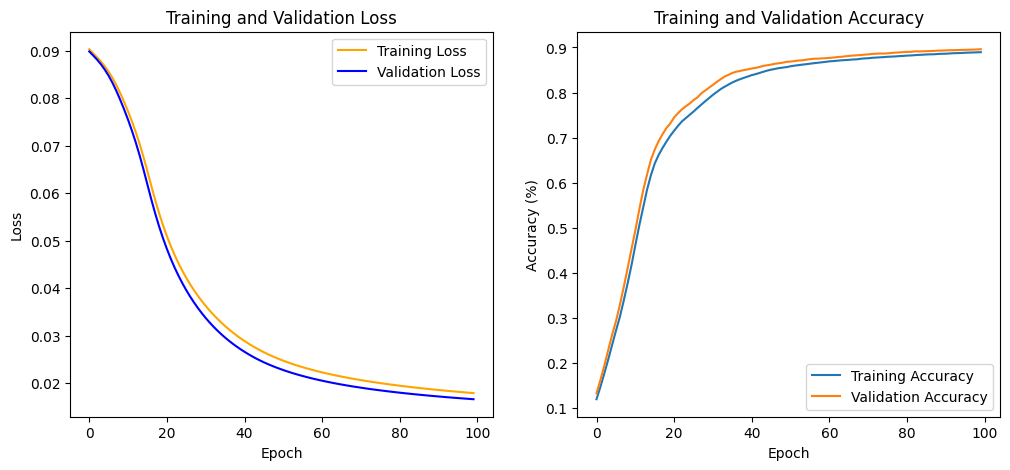

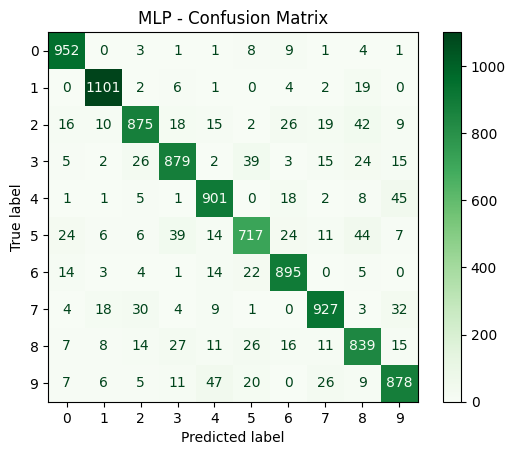

In [11]:
# Plot training loss, accuracy and confussion matrix
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

# Confusion Matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=range(num_classes))
cmd.plot(cmap=plt.cm.Greens)
plt.title(f"MLP - Confusion Matrix")

plt.show()

In [12]:
import session_info
session_info.show(html=False)

-----
keras               3.6.0
matplotlib          3.9.2
numpy               1.26.4
session_info        1.0.0
sklearn             1.5.2
tensorflow          2.17.1
-----
IPython             8.28.0
jupyter_client      8.6.3
jupyter_core        5.7.2
-----
Python 3.12.3 (main, Nov  6 2024, 18:32:19) [GCC 13.2.0]
Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39
-----
Session information updated at 2025-01-14 16:45


# 